In [ ]:
#old email method
"""
 ##### email post endpoint #####
@app.route('/email', methods=["POST"])
def email():
    email = str(request.data, "utf-8")
    if len(re.findall(r"^\w+@[a-z]+\.\w{3}$", email)) > 0: # 1
        with open("emails.txt", "a") as f:
            f.write(email + "\n") # 2
        with open("emails.txt", "r") as f:
            num_subscribed = sum(1 for _ in f) # count number of lines
            
        return jsonify(f"thanks {email}, your subscriber number is {num_subscribed}!")
    return jsonify("Your email address is invalid. Example: 'someone@gmail.com'") # 3
"""

In [ ]:
import pandas as pd
ctr_df = pd.DataFrame({"CT":[0,0], "NCT":[0,0], "TOTAL":[0,0]},["A", "B"])

In [ ]:
ctr_df

In [ ]:
ab_counter = True

In [ ]:
with open("src/index.html") as f:
    global ab_counter
    html = f.read()
    if ab_counter:
        ab_counter = False
        html.replace("#donate_link#", "?from=A")
    else:
        ab_counter = True
        html.replace("#donate_link#", "?from=B")
print(html)

In [ ]:
a = "boogie_bomb"
print(a)
a = a.replace("_bomb","_dude")
print(a)

In [ ]:
#df = pd.read_csv("unagg_main.csv")

#df['Time'] = df['Time'].astype('datetime64[s]').dt.date

#df = df.groupby(['Time']).agg('sum')

#display(df)

#df.to_csv('main.csv')

In [183]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib
import matplotlib.pyplot as plt
import io
#matplotlib.use('Agg')
#fig.savefig(<file object>, format=<fig format>)

In [187]:
df = pd.read_csv("main.csv")
#df = df.set_index('Time')
#df.head(2)

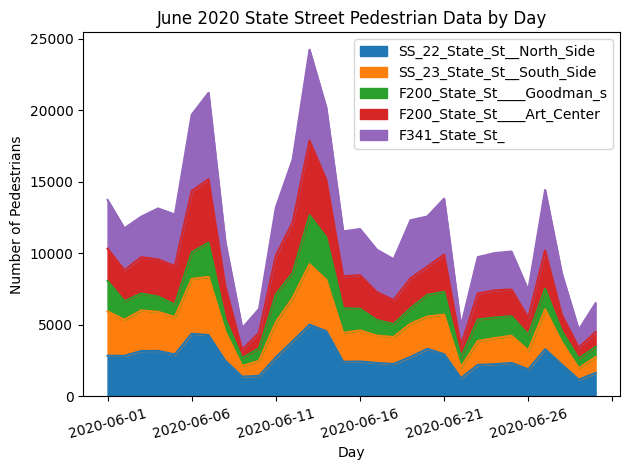

In [188]:
# dashboard 2
y = list(df.columns)[1:-1]

fig, ax = plt.subplots()
df.plot.area(x='Time', y=y, ax=ax, rot=15)
ax.set_xlabel("Day")
ax.set_ylabel("Number of Pedestrians")
ax.set_title("June 2020 State Street Pedestrian Data by Day")

plt.tight_layout()
ax.get_figure().savefig('dashboard2.svg')
plt.close()
ax.get_figure()

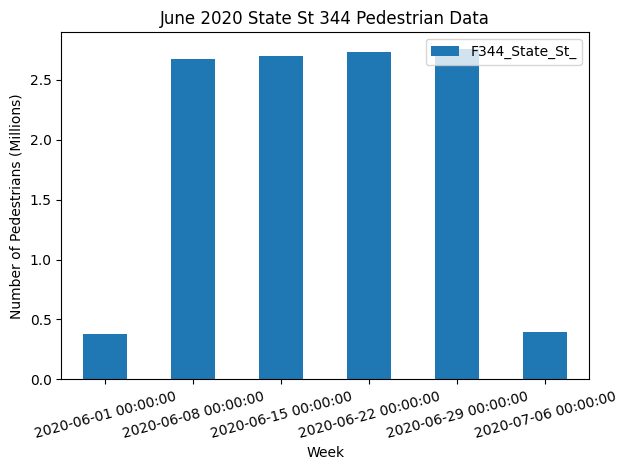

In [189]:
#dashboard 1-query
df['Time'] = pd.to_datetime(df['Time']).dt.normalize()
f = df[['Time','F344_State_St_']]
f['F344_State_St_'] = f['F344_State_St_'].div(1000000)
f = f.resample('W-Mon', on='Time').sum().reset_index()

fig, ax = plt.subplots()
f.plot.bar(x='Time', ax=ax, rot=15)
ax.set_xlabel("Week")
ax.set_ylabel("Number of Pedestrians (Millions)")
ax.set_title("June 2020 State St 344 Pedestrian Data")

plt.tight_layout()
ax.get_figure().savefig('dashboard1-query.svg')
plt.close()
ax.get_figure()

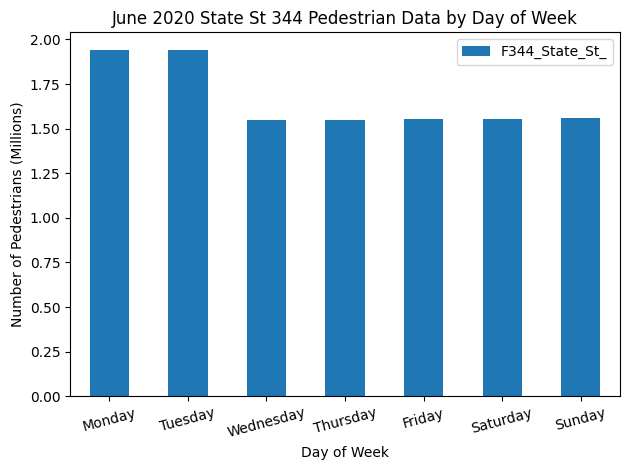

In [190]:
#dashboard 1
b = df[['Time','F344_State_St_']]
b['F344_State_St_'] = b['F344_State_St_'].div(1000000)
b['Time'] = b['Time'].dt.day_name()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
b = b.groupby(b['Time']).sum().reindex(days).reset_index()

fig, ax = plt.subplots()
b.plot.bar(x='Time', ax=ax, rot=15)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Pedestrians (Millions)")
ax.set_title("June 2020 State St 344 Pedestrian Data by Day of Week")

plt.tight_layout()
ax.get_figure().savefig('dashboard1.svg')
plt.close()
ax.get_figure()